## Challenge 1

In [1]:
import pandas as pd 
import random as rd

In [6]:
results = []
for i in range (10):
    results.append(rd.randint(1,6))
rolls = pd.DataFrame(results)
rolls

,0
0,2
1,3
2,5
3,4
4,1
5,1
6,1
7,2
8,5
9,2


In [76]:
rolls

,results
0,2
1,3
2,5
3,4
4,1
5,1
6,1
7,2
8,5
9,2


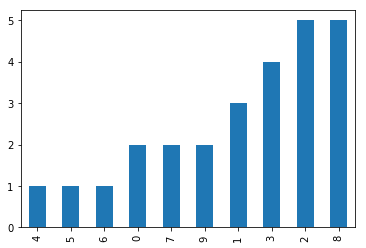

In [48]:
rolls['results'].sort_values().plot(kind='bar')

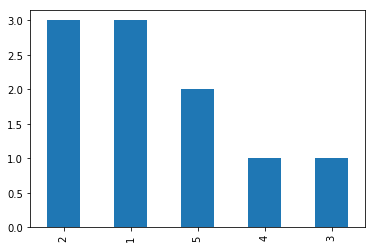

In [50]:
rolls['results'].value_counts().plot(kind='bar')

## Challenge 2

In [60]:
def mean(l):
    return sum(l)/len(l)

mean(rolls['results'])

2.6

In [53]:
#def mean_hard:
    rolls['results'].value_counts()

2    3
1    3
5    2
4    1
3    1
Name: results, dtype: int64

In [95]:
def median(l):
    numbers = l['results'].sort_values().reset_index()['results']
    if len(numbers) % 2 == 0:
        return (numbers[len(numbers)//2] + numbers[len(numbers)//2 +1])/2
    else:
        return numbers//2
median(rolls)

2.5

In [ ]:
def quantiles(df):
    

5.0

## Challenge 3

In [98]:
cosa = pd.read_csv('roll_the_dice_hundred.csv')
cosa.sort_values(by='value')

,Unnamed: 0,roll,value
0,0,0,1
47,47,47,1
56,56,56,1
9,9,9,1
73,73,73,1
63,63,63,1
26,26,26,1
89,89,89,1
3,3,3,1
94,94,94,1


In [101]:
mean(cosa['roll'])

49.5

In [103]:
 cosa['value'].value_counts()

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

In [105]:
otra_cosa = pd.read_csv('roll_the_dice_thousand.csv')
otra_cosa

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5
5,5,5,2
6,6,6,6
7,7,7,5
8,8,8,6
9,9,9,6


In [107]:
otra_cosa['value'].value_counts()

3    175
1    175
4    168
2    167
6    166
5    149
Name: value, dtype: int64

## Challenge 4

In [128]:
cosa2 = pd.read_csv('ages_population.csv')
cosa2 = cosa2['observation'].value_counts()
cosa2 =  pd.DataFrame(data = cosa2).sort_index().reset_index().rename(columns={'index': 'age'})


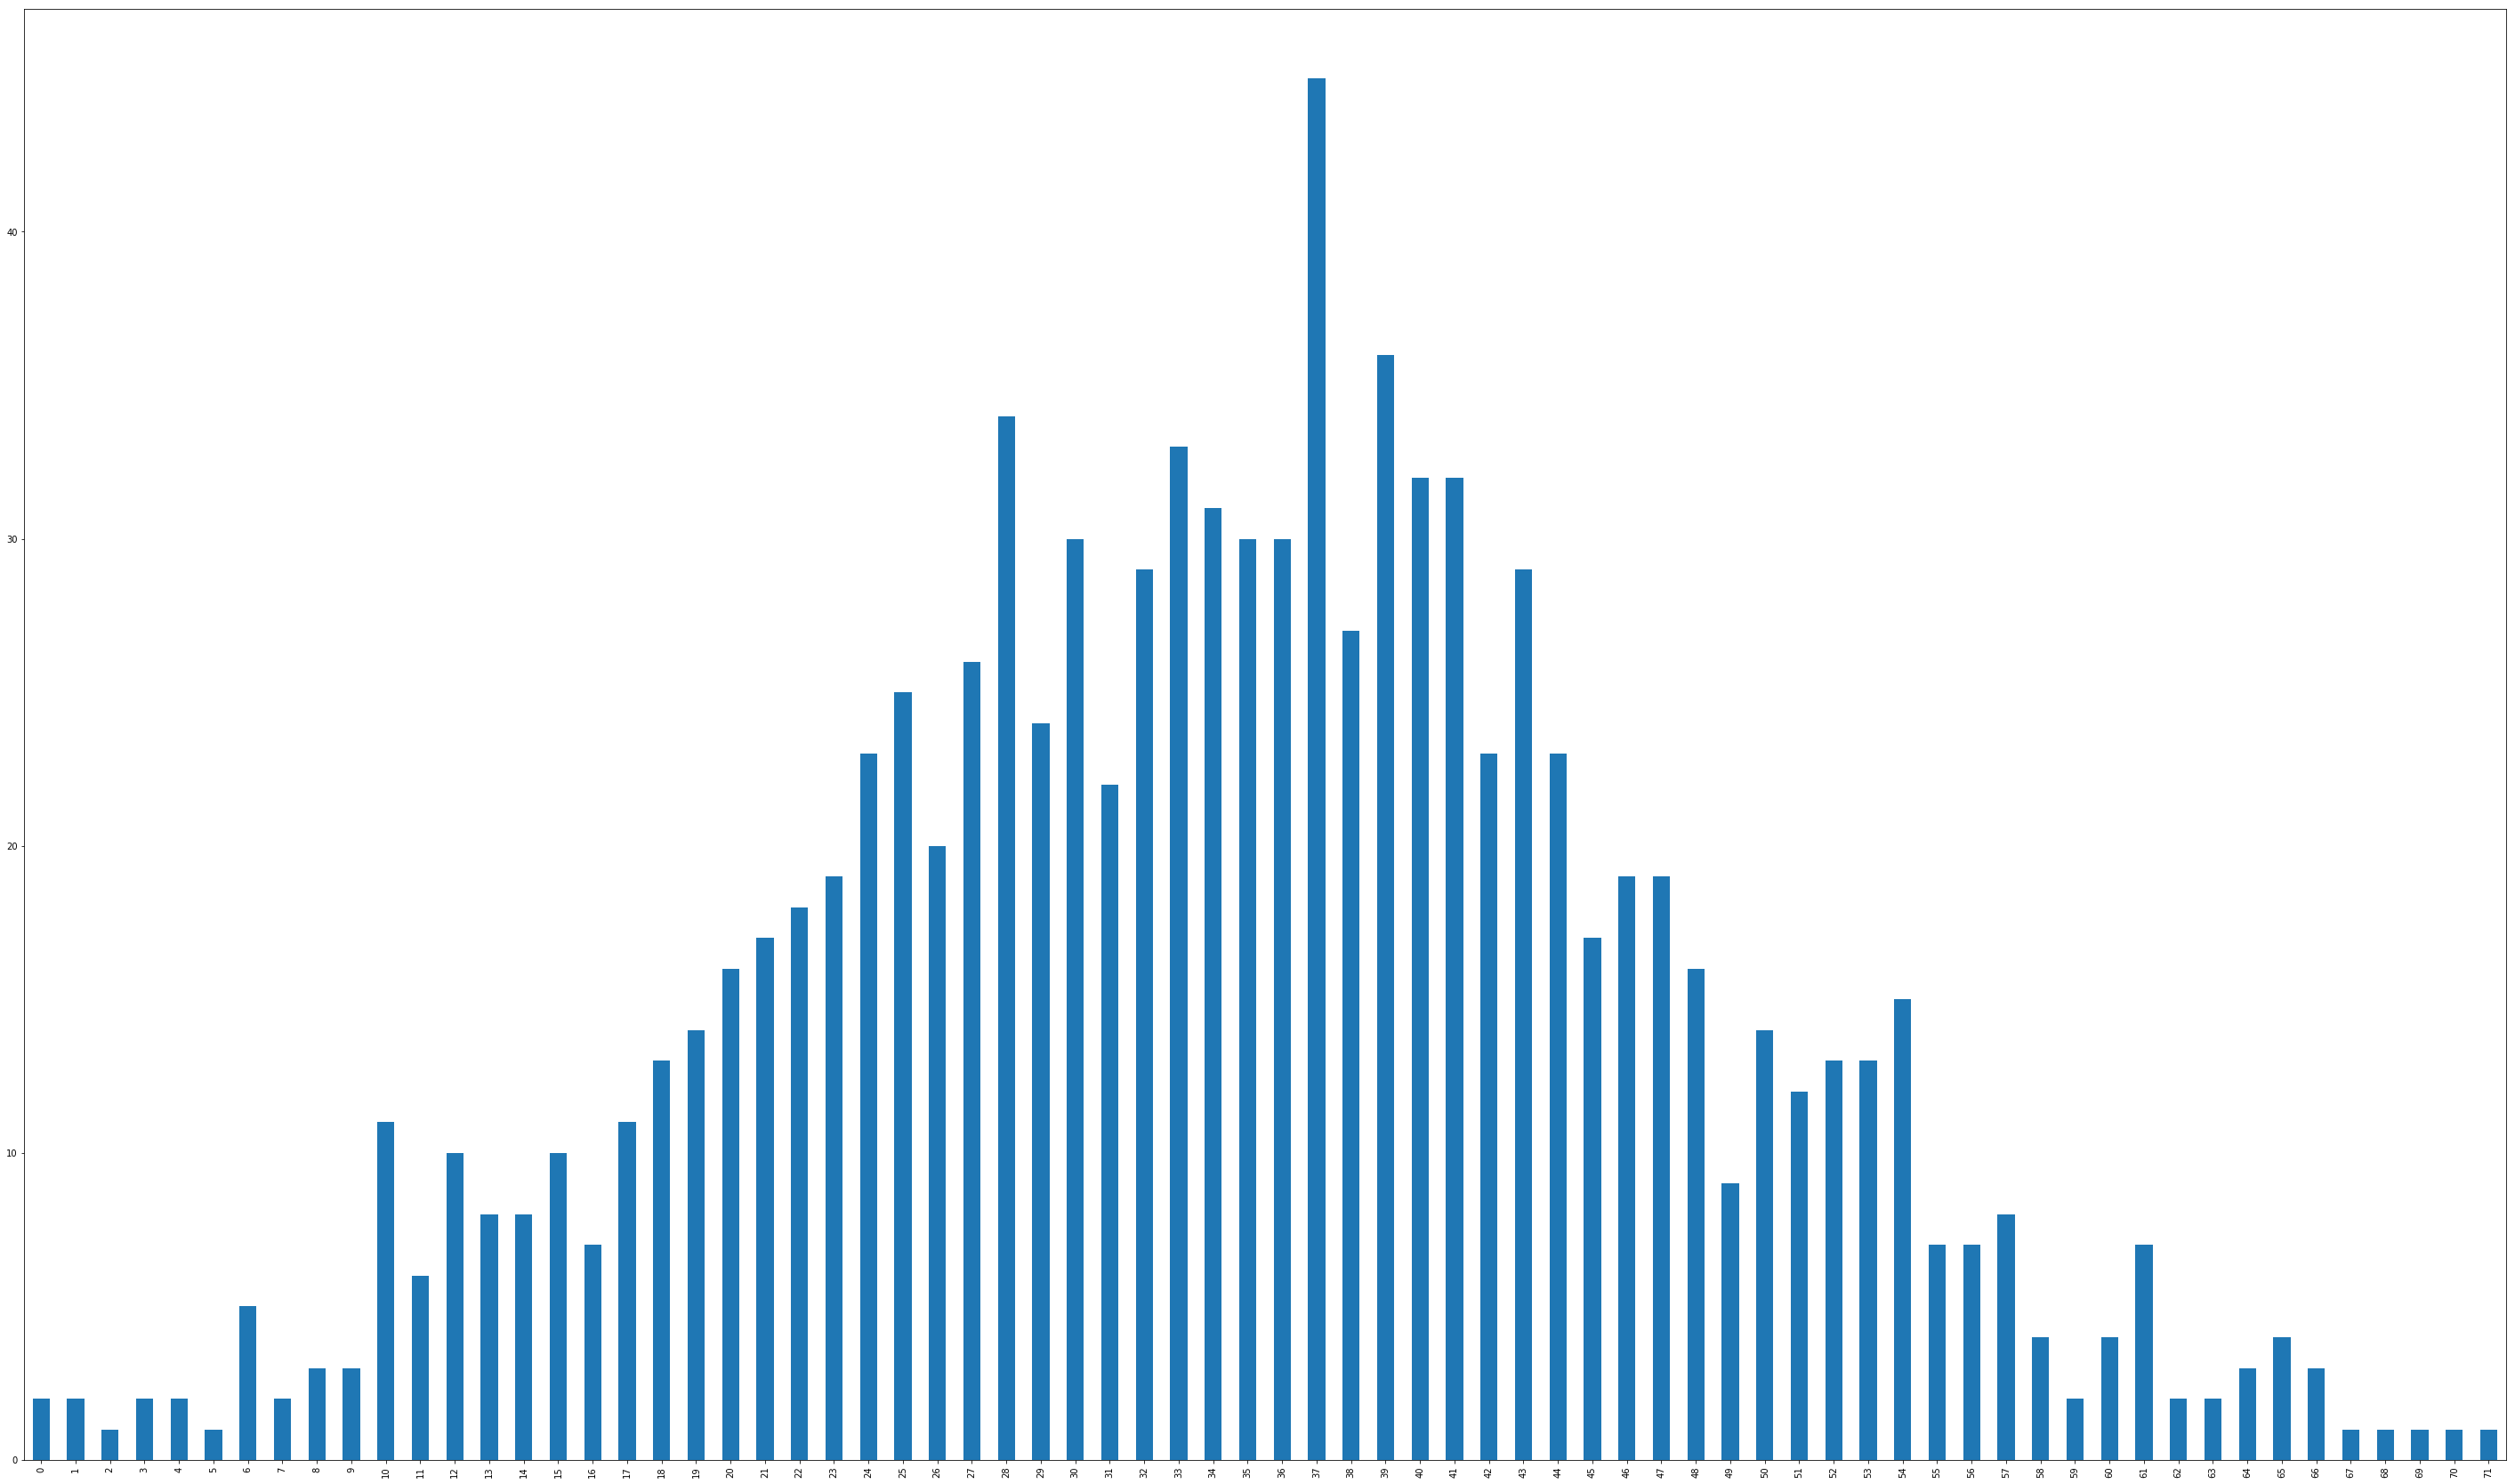

In [131]:
cosa2['observation'].plot(kind='bar', figsize=(50,30))

In [132]:
cosa3 = pd.read_csv('ages_population2.csv')
cosa3 = cosa3['observation'].value_counts()
cosa3 =  pd.DataFrame(data = cosa3).sort_index().reset_index().rename(columns={'index': 'age'})


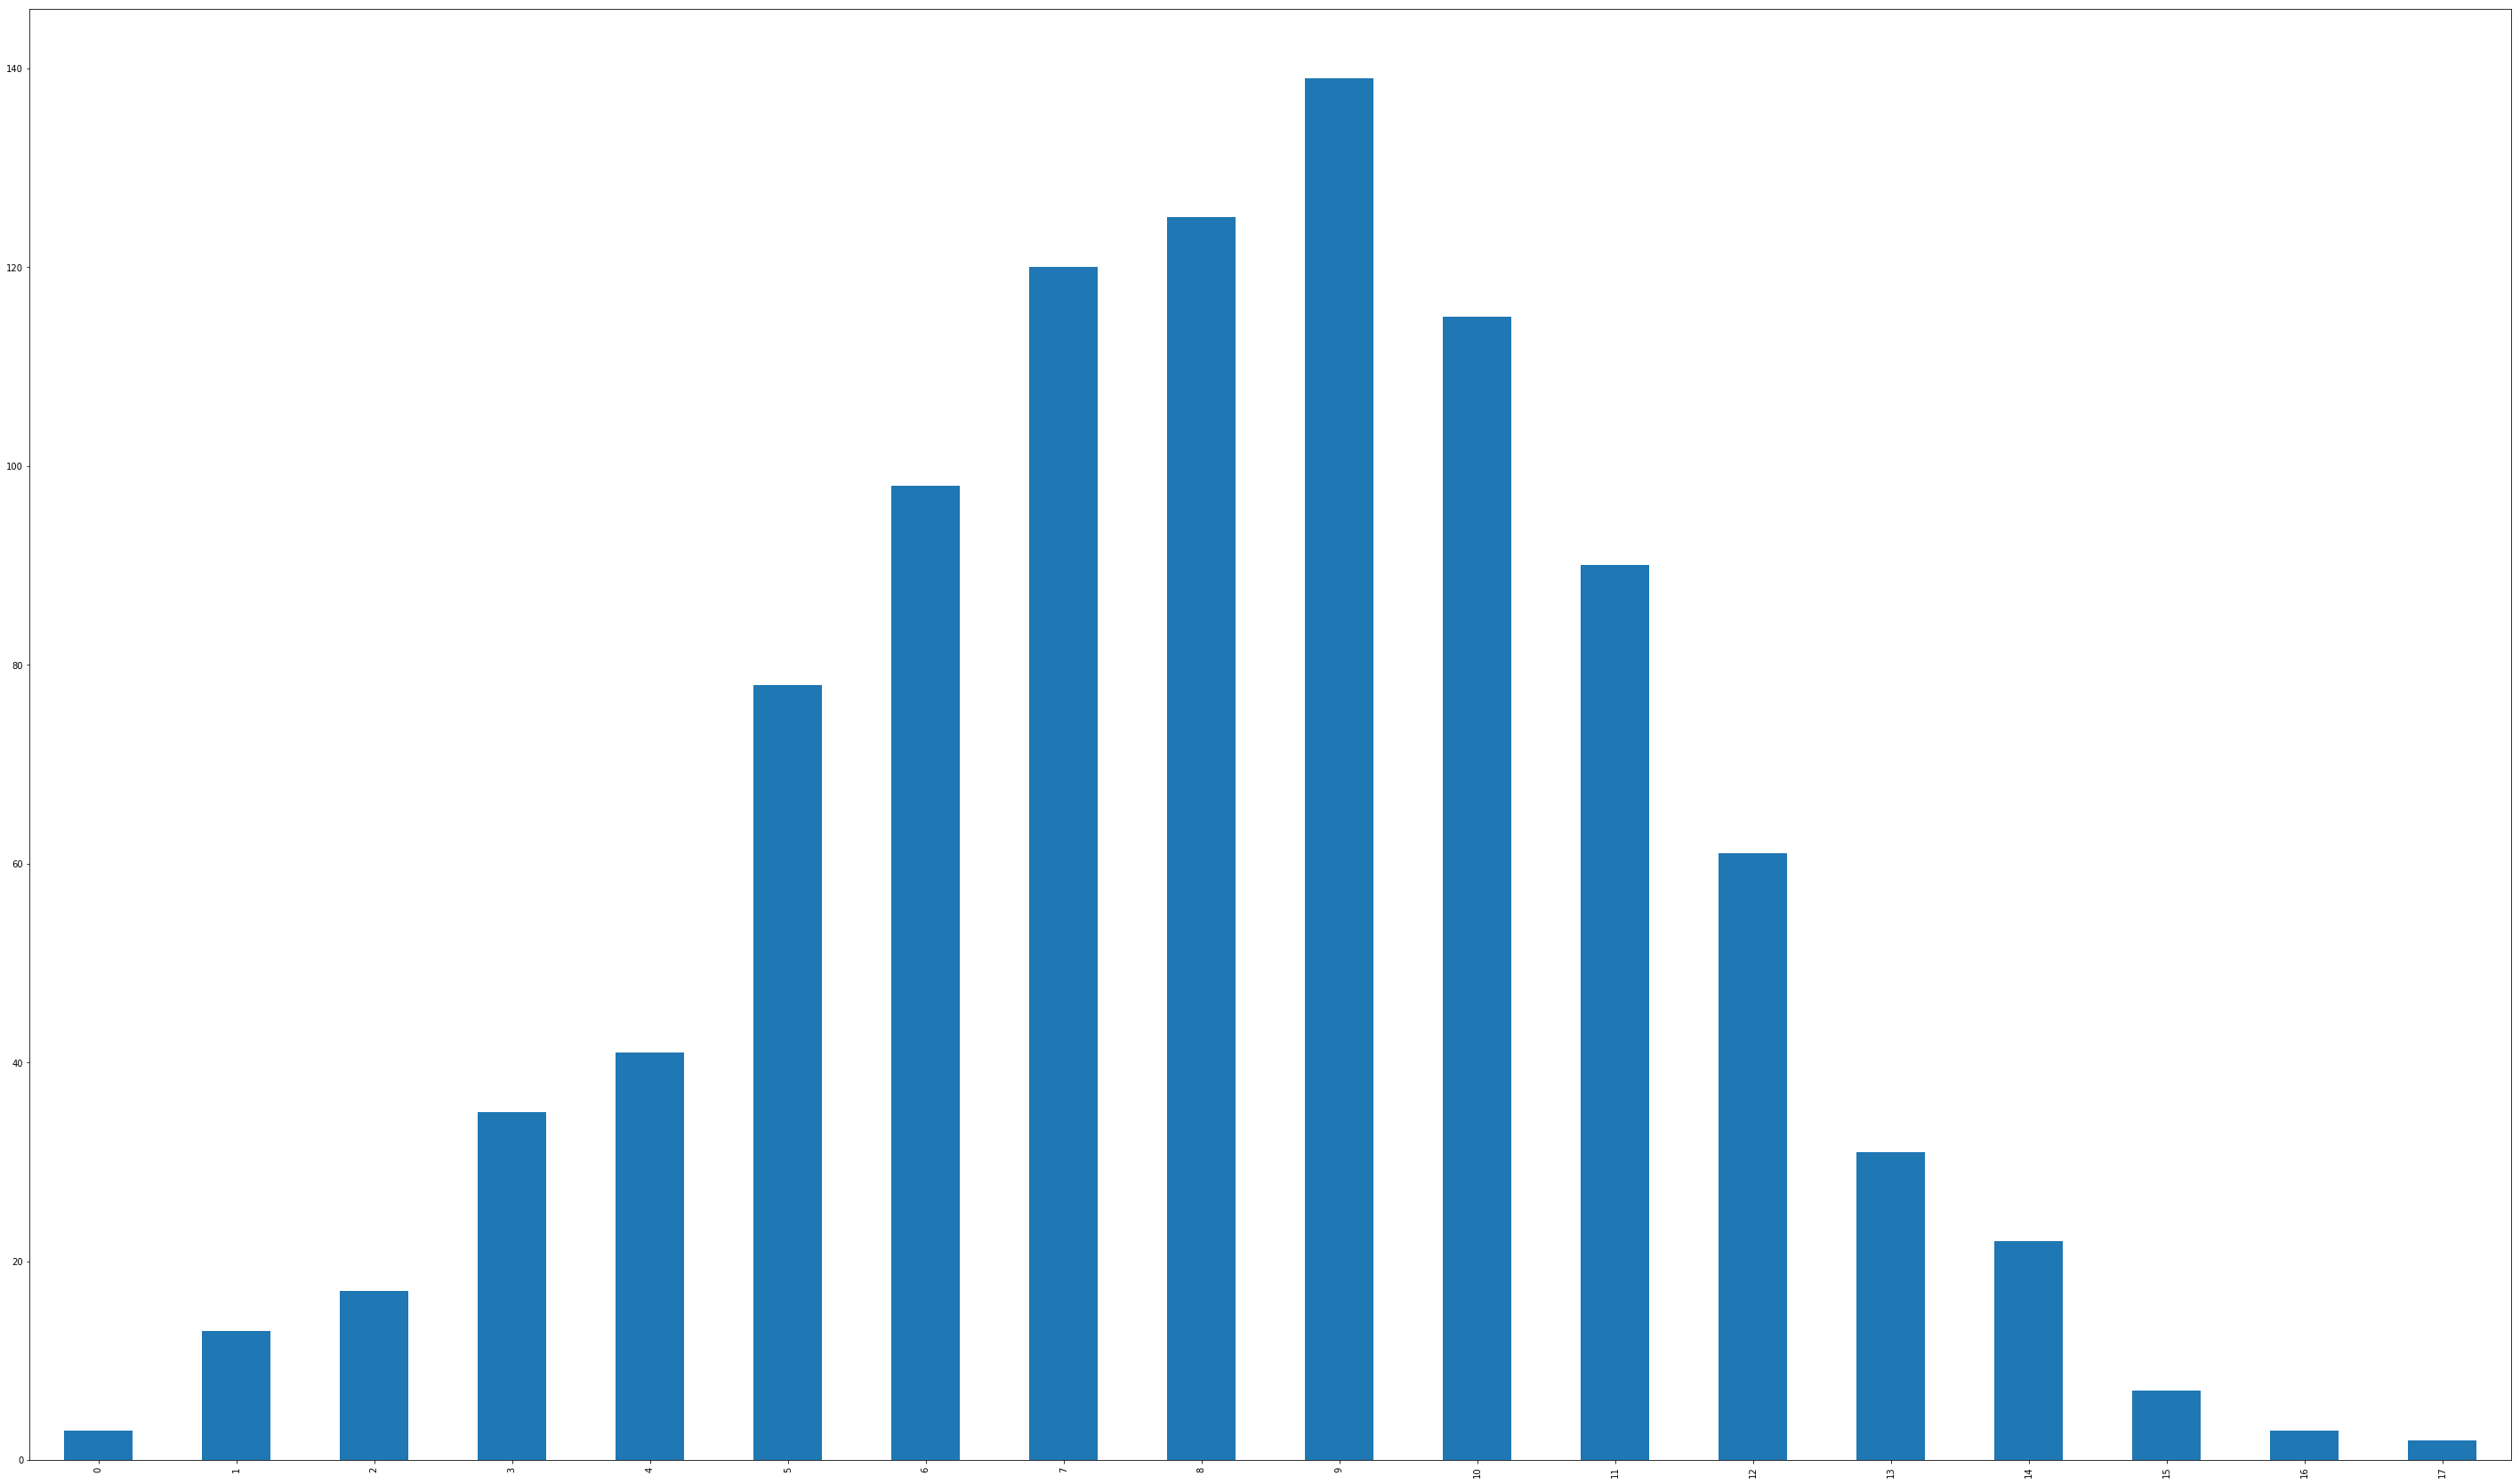

In [133]:
cosa3['observation'].plot(kind='bar', figsize=(50,30))

In [136]:
import numpy as np
print(mean(cosa2['observation']))
print(mean(cosa3['observation']))
print(np.std(cosa2['observation']))
print(np.std(cosa3['observation']))

13.88888888888889
55.55555555555556
11.183514101315424
46.788201530611715


## Challenge 5